In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#Load data 
data=pd.read_csv(r'C:\Users\user\Desktop\GB Data Science\Predictive Modeling\Assignment 2\Wisconsin_Diagnostic_Breast_Cancer.csv')

In [4]:
#Listing out all columns and their data types
data.dtypes

ID                  int64
Clum_thick          int64
Unif_cell_size      int64
Unif_cell_shape     int64
Marg_adhesion       int64
single_epich        int64
Bare_nuc           object
Bland_chrom         int64
Norm_nucl           int64
Mitoses             int64
Class               int64
dtype: object

In [5]:
data.head()

,ID,Clum_thick,Unif_cell_size,Unif_cell_shape,Marg_adhesion,single_epich,Bare_nuc,Bland_chrom,Norm_nucl,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


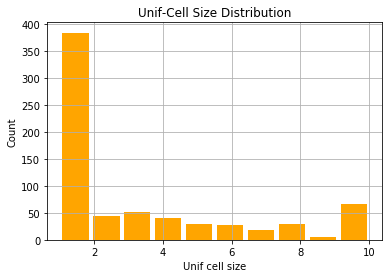

In [6]:
#Create a histogram of unif-cell size
plt.hist(data['Unif_cell_size'],rwidth=0.85,color ='orange')
plt.xlabel('Unif cell size')
plt.ylabel('Count')
plt.title('Unif-Cell Size Distribution')
plt.grid(True)
#plt.legend()
plt.show()

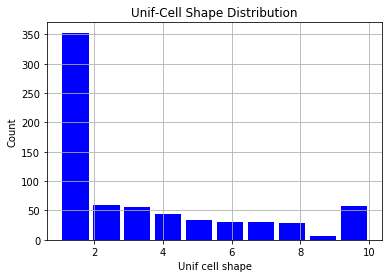

In [9]:
#Create a histogram of Unif-Cell shape
plt.hist(data['Unif_cell_shape'],rwidth=0.85,color ='b')
plt.xlabel('Unif cell shape')
plt.ylabel('Count')
plt.title('Unif-Cell Shape Distribution')
plt.grid(True)
#plt.legend()
plt.show()

In [10]:
data.columns

Index(['ID', 'Clum_thick', 'Unif_cell_size', 'Unif_cell_shape',
       'Marg_adhesion', 'single_epich', 'Bare_nuc', 'Bland_chrom', 'Norm_nucl',
       'Mitoses', 'Class'],
      dtype='object')

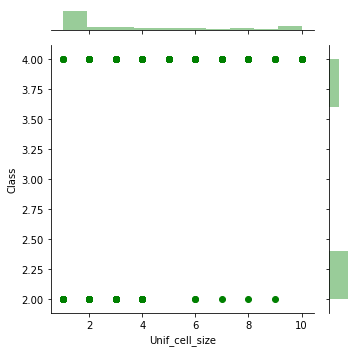

In [13]:
#Create a jointplot with Unif Cell Size and Class
sns.jointplot(x="Unif_cell_size",y="Class",data=data, color='g',height = 5,ratio=8,space =0.8)

In [14]:
#Investigate and invalid or missing (NaN) data and deal with it
data.isnull().sum()

ID                 0
Clum_thick         0
Unif_cell_size     0
Unif_cell_shape    0
Marg_adhesion      0
single_epich       0
Bare_nuc           0
Bland_chrom        0
Norm_nucl          0
Mitoses            0
Class              0
dtype: int64

In [15]:
#There is no NA values

In [16]:
#However, there is weird symbols in "Bare_nuc" column. Let's replace these weird symbols with the average value of "Bare_nuc" column 
data['Bare_nuc'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [17]:
#Calculating the average value of "Bare nuc"
data2= data.loc[data['Bare_nuc']!='?']
data2['Bare_nuc']= pd.to_numeric(data2['Bare_nuc'])
data2['Bare_nuc'].mean()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


3.5446559297218156

In [18]:
#Replacing the weird symbol to the averge value
data['Bare_nuc'].replace('?','4',inplace=True)

In [19]:
#Changing "Bare nuc" data type to numeric
data['Bare_nuc']=pd.to_numeric(data['Bare_nuc'])
data['Bare_nuc'].dtypes

dtype('int64')

In [20]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split
#Checking if the output variable is binary
data['Class'].unique()

array([2, 4], dtype=int64)

In [21]:
X=data[['Clum_thick','Unif_cell_size','Unif_cell_shape','Marg_adhesion','single_epich','Bare_nuc','Bland_chrom','Norm_nucl']]

In [22]:
Y=data['Class']

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=40)

In [25]:
#Create a Logistic Regression classifier and train it using your Training data set
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(X_train,Y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
#Make predictions using test data and generate confusion matrix of your results
prediction = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, prediction)
print(cm)

[[135   6]
 [  5  64]]


Accuracy: 0.9476190476190476


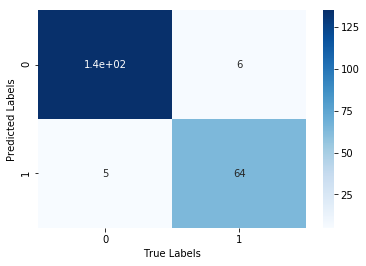

In [29]:
#Generate the confusion matrix and compare the accuracy with the result of previous step
sns.heatmap(cm, cmap='Blues', annot=True)
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")


from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(Y_test, prediction)))

In [30]:
from sklearn.metrics import accuracy_score
print("Accuracy: {}".format(accuracy_score(Y_test, prediction)))

Accuracy: 0.9476190476190476


# Comments#

From the confustion matrix, it can be calculated that the accuracy is equal to (135+64)/(135+6+5+64) = 0.948, which is the same as the accuracy score